In [1]:
import pandas as pd
import glob
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

from ydata_profiling import ProfileReport

In [2]:
lebron_df = pd.read_csv("data//lebron_csv")
lebron_df.head()

Unnamed: 0  G_x             Date_x Start (ET) Unnamed: 3 Unnamed: 4  \
0           0    1   Wed, Nov 3, 2004      7:00p        NaN  Box Score   
1           1    2   Thu, Nov 4, 2004      8:00p        NaN  Box Score   
2           2    3   Sat, Nov 6, 2004      8:30p        NaN  Box Score   
3           3    4   Tue, Nov 9, 2004      7:30p        NaN  Box Score   
4           4    5  Wed, Nov 10, 2004      8:00p        NaN  Box Score   

  Unnamed: 5_x         Opponent Unnamed: 7_x Unnamed: 8  ...  STL  BLK  TOV  \
0          NaN   Indiana Pacers            L        2OT  ...  1.0  3.0  6.0   
1            @       Miami Heat            L        NaN  ...  1.0  0.0  1.0   
2            @  Milwaukee Bucks            L        NaN  ...  3.0  0.0  4.0   
3            @    Atlanta Hawks            W        NaN  ...  4.0  2.0  3.0   
4          NaN     Phoenix Suns            W         OT  ...  3.0  3.0  3.0   

    PF   PTS  GmSc   +/-   Season_y  \
0  2.0  28.0  20.9 -10.0  2004-2005   
1  0.0  21.0  17.8  -8.0  2004-2005   
2  0.0  31.0  23.8 -12.0  2004-2005   
3  2.0  25.0  22.5  14.0  2004-2005   
4  1.0  38.0  36.1  14.0  2004-2005   

   ValueError: Excel file format cannot be determined, you must specify an engine manually.  \
0                                                NaN                                          
1                                                NaN                                          
2                                                NaN                                          
3                                                NaN                                          
4                                                NaN                                          

   Year  
0  2004  
1  2004  
2  2004  
3  2004  
4  2004  

[5 rows x 51 columns]

In [3]:
steph_df = pd.read_csv("data//steph_csv")
steph_df.head()

Unnamed: 0  G_x             Date_x Start (ET) Unnamed: 3 Unnamed: 4  \
0           0    1  Wed, Oct 28, 2009     10:30p        NaN  Box Score   
1           1    2  Fri, Oct 30, 2009     10:00p        NaN  Box Score   
2           2    3   Wed, Nov 4, 2009     10:30p        NaN  Box Score   
3           3    4   Fri, Nov 6, 2009     10:30p        NaN  Box Score   
4           4    5   Sun, Nov 8, 2009      9:00p        NaN  Box Score   

  Unnamed: 5_x              Opponent Unnamed: 7_x Unnamed: 8  ...  AST  STL  \
0          NaN       Houston Rockets            L        NaN  ...  7.0  4.0   
1            @          Phoenix Suns            L        NaN  ...  4.0  1.0   
2          NaN     Memphis Grizzlies            W        NaN  ...  9.0  2.0   
3          NaN  Los Angeles Clippers            L        NaN  ...  3.0  0.0   
4            @      Sacramento Kings            L        NaN  ...  6.0  0.0   

   BLK  TOV   PF   PTS  GmSc   +/-   Season_y  Year  
0  0.0  2.0  2.0  14.0  15.5   7.0  2009-2010  2009  
1  0.0  3.0  5.0  12.0   7.1 -19.0  2009-2010  2009  
2  0.0  1.0  4.0   7.0  11.2  -4.0  2009-2010  2009  
3  0.0  0.0  6.0   5.0   1.5 -13.0  2009-2010  2009  
4  0.0  5.0  4.0   9.0   3.4  -5.0  2009-2010  2009  

[5 rows x 50 columns]

In [4]:
# lebron_profile = ProfileReport(lebron_df, title="Lebron Data")
# lebron_profile.to_notebook_iframe()
# lebron_profile.to_file("lebron.html")

In [5]:
# steph_profile = ProfileReport(steph_df, title="Steph Data")
# steph_profile.to_notebook_iframe()
# steph_profile.to_file("steph.html")

In [6]:
def mp_float(time):
    minutes = time.split(":")[0]
    seconds = time.split(":")[1]
    
    minutes = int(minutes)
    seconds = int(seconds)

    total_seconds = minutes * 60 + seconds

    total_seconds_float = float(total_seconds)
    return total_seconds_float

In [7]:
print(mp_float("60:00:00"))

3600.0


In [8]:
lebron_df["MP"] = lebron_df["MP"].apply(mp_float)

In [9]:
steph_df["MP"] = steph_df["MP"].apply(mp_float)

In [10]:
lebron_df[lebron_df["+/-"].isnull()] = lebron_df["+/-"].mean()

C:\Users\YAMADA Hibiki\AppData\Local\Temp\ipykernel_21384\1247007330.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.071932299012694' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  lebron_df[lebron_df["+/-"].isnull()] = lebron_df["+/-"].mean()
C:\Users\YAMADA Hibiki\AppData\Local\Temp\ipykernel_21384\1247007330.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.071932299012694' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  lebron_df[lebron_df["+/-"].isnull()] = lebron_df["+/-"].mean()
C:\Users\YAMADA Hibiki\AppData\Local\Temp\ipykernel_21384\1247007330.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.071932299012694' has dtype incompatible with

In [11]:
def return_win_or_lose(row):
    if row["Tm_x"] > row["Opp_x"]:
        return 1
    else:
        return 0

In [12]:
lebron_df["Win"] = lebron_df.apply(return_win_or_lose, axis=1)

In [13]:
steph_df["Win"] = steph_df.apply(return_win_or_lose, axis=1)

In [14]:
stats_for_win_df = lebron_df[["Win", "MP", "FG", "FG%", "3P", "3P%", "TRB", "AST", "PTS", "+/-"]] # Columns concerning Winned games

In [15]:
stats_for_win_df.corr() # We recognize that there is a strong correlation between Win and +/-
# Also weak correlation between Win, FG%, AST, PTS
# Interestingly, more he plays, more the team loses
# +/- --> Par exemple, si un joueur a un +/- de +10 dans un match, cela signifie que son équipe a marqué 10 points de plus que
# l'équipe adverse pendant le temps où il était sur le terrain
# MP --> Minutes played
# FG --> field goal
# TRB --> total rebound
# AST --> Assist
# PTS --> Points

Win        MP        FG       FG%        3P       3P%       TRB  \
Win  1.000000 -0.114321  0.095883  0.147587  0.013034  0.071095  0.059993   
MP  -0.114321  1.000000  0.318732 -0.214834  0.033022 -0.112149  0.201941   
FG   0.095883  0.318732  1.000000  0.381908  0.402876  0.217129  0.130477   
FG%  0.147587 -0.214834  0.381908  1.000000  0.201377  0.561287 -0.028927   
3P   0.013034  0.033022  0.402876  0.201377  1.000000  0.651704  0.030482   
3P%  0.071095 -0.112149  0.217129  0.561287  0.651704  1.000000 -0.031154   
TRB  0.059993  0.201941  0.130477 -0.028927  0.030482 -0.031154  1.000000   
AST  0.180308  0.129631 -0.049196 -0.021759 -0.009643 -0.050476  0.176448   
PTS  0.107138  0.405233  0.891409  0.282797  0.489367  0.249592  0.138644   
+/-  0.717393 -0.201997  0.090176  0.189747  0.036113  0.106746  0.076002   

          AST       PTS       +/-  
Win  0.180308  0.107138  0.717393  
MP   0.129631  0.405233 -0.201997  
FG  -0.049196  0.891409  0.090176  
FG% -0.021759  0.282797  0.189747  
3P  -0.009643  0.489367  0.036113  
3P% -0.050476  0.249592  0.106746  
TRB  0.176448  0.138644  0.076002  
AST  1.000000 -0.048814  0.181862  
PTS -0.048814  1.000000  0.090677  
+/-  0.181862  0.090677  1.000000

In [16]:
more_accurate_stats_for_win_df = lebron_df[["Win", "MP", "FG%", "AST", "PTS", "+/-"]]

In [17]:
more_accurate_stats_for_win_df.corr()

Win        MP       FG%       AST       PTS       +/-
Win  1.000000 -0.114321  0.147587  0.180308  0.107138  0.717393
MP  -0.114321  1.000000 -0.214834  0.129631  0.405233 -0.201997
FG%  0.147587 -0.214834  1.000000 -0.021759  0.282797  0.189747
AST  0.180308  0.129631 -0.021759  1.000000 -0.048814  0.181862
PTS  0.107138  0.405233  0.282797 -0.048814  1.000000  0.090677
+/-  0.717393 -0.201997  0.189747  0.181862  0.090677  1.000000

<Axes: >

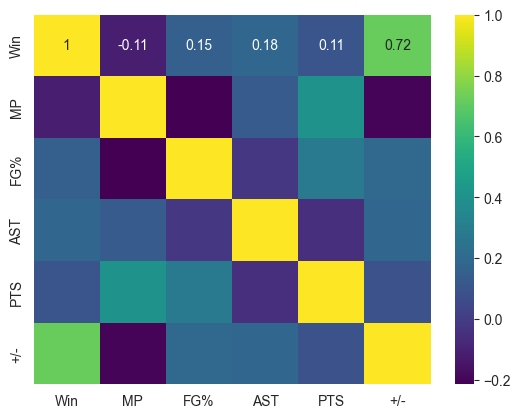

In [18]:
sns.heatmap(data=more_accurate_stats_for_win_df.corr(), cmap="viridis", annot=True)

<Figure size 1000x600 with 0 Axes>

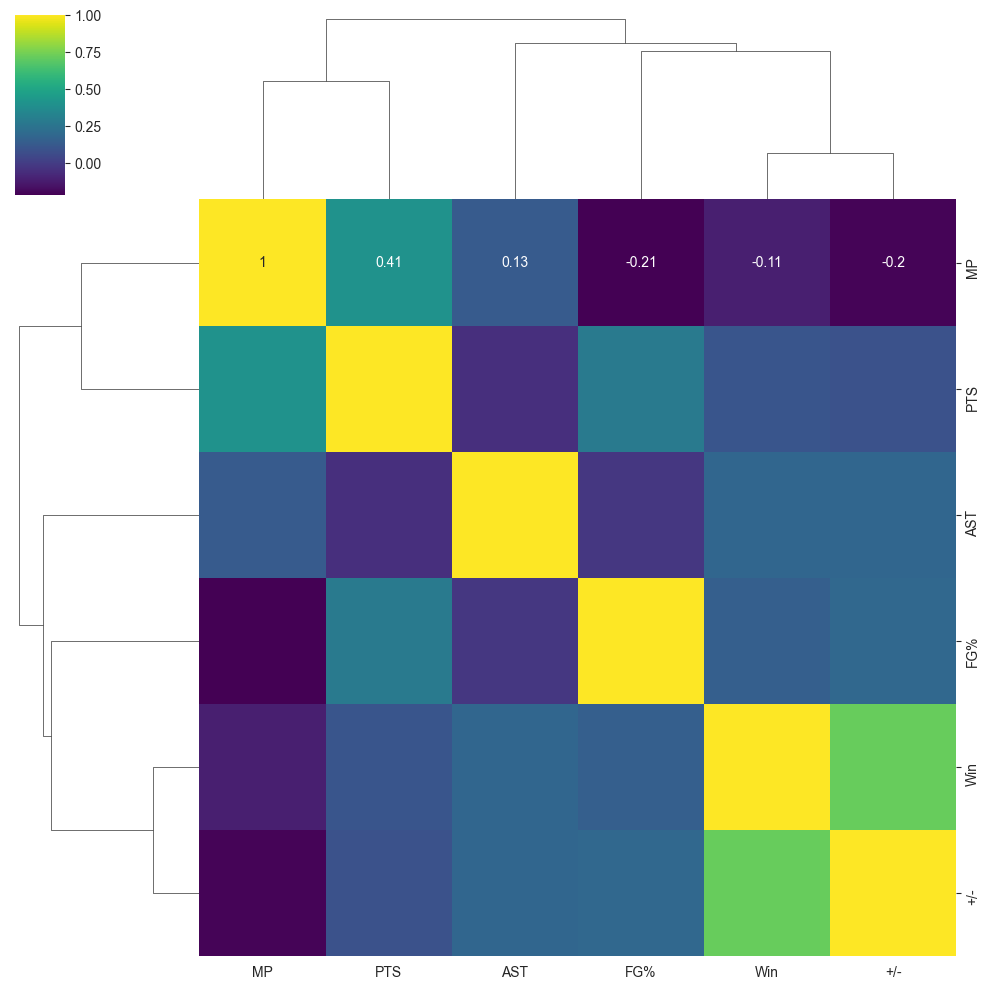

In [19]:
sns.clustermap(more_accurate_stats_for_win_df.corr(), cmap="viridis", annot=True)

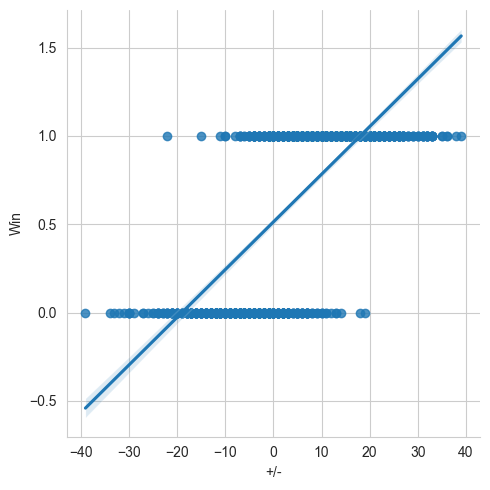

In [20]:
sns.lmplot(x="+/-", y="Win", data=more_accurate_stats_for_win_df)
# There is a strong correation between Wins and +/-(plus-minus)
# Now do the same thing for steph

In [21]:
stats_for_win_df_steph = steph_df[["Win", "MP", "FG", "FG%", "3P", "3P%", "TRB", "AST", "PTS", "+/-"]] # Columns concerning Winned games

In [22]:
stats_for_win_df_steph.corr() # For Stphen Curry there are correlations between Win, MP, FG%, 3P, AST, PTS, and +/-
# Just like Lebron, more he plays more the team loses
# Interestingly, correlation between Win and +/-, for Stphen 0.72 and for Lebron 0.71.
# Both players have almost the same impact in term of +/-!! (plus-minus)

Win        MP        FG       FG%        3P       3P%       TRB  \
Win  1.000000 -0.140894  0.118382  0.197244  0.189195  0.168465  0.062099   
MP  -0.140894  1.000000  0.408338  0.115668  0.194287  0.107064  0.245170   
FG   0.118382  0.408338  1.000000  0.675840  0.750588  0.453799  0.206348   
FG%  0.197244  0.115668  0.675840  1.000000  0.492203  0.646436  0.027698   
3P   0.189195  0.194287  0.750588  0.492203  1.000000  0.632162  0.158105   
3P%  0.168465  0.107064  0.453799  0.646436  0.632162  1.000000  0.016328   
TRB  0.062099  0.245170  0.206348  0.027698  0.158105  0.016328  1.000000   
AST  0.170164  0.237790  0.029832  0.014632 -0.012975 -0.034657  0.075647   
PTS  0.165192  0.389671  0.942541  0.612011  0.816324  0.472670  0.232119   
+/-  0.722727 -0.082448  0.204790  0.316829  0.280556  0.231663  0.133288   

          AST       PTS       +/-  
Win  0.170164  0.165192  0.722727  
MP   0.237790  0.389671 -0.082448  
FG   0.029832  0.942541  0.204790  
FG%  0.014632  0.612011  0.316829  
3P  -0.012975  0.816324  0.280556  
3P% -0.034657  0.472670  0.231663  
TRB  0.075647  0.232119  0.133288  
AST  1.000000  0.012807  0.241719  
PTS  0.012807  1.000000  0.247241  
+/-  0.241719  0.247241  1.000000

In [24]:
more_accurate_stats_for_win_df_steph = steph_df[["Win", "MP", "FG%", "AST", "PTS", "+/-"]]

<Axes: >

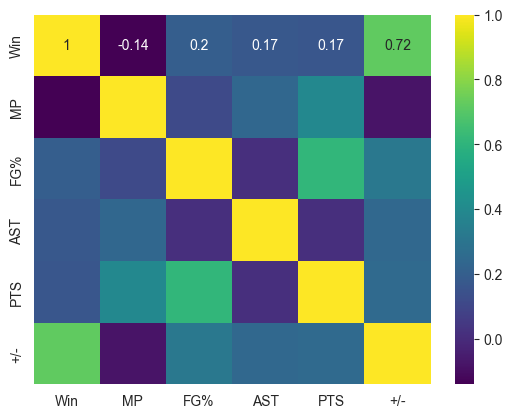

In [25]:
sns.heatmap(data=more_accurate_stats_for_win_df_steph.corr(), cmap="viridis", annot=True)

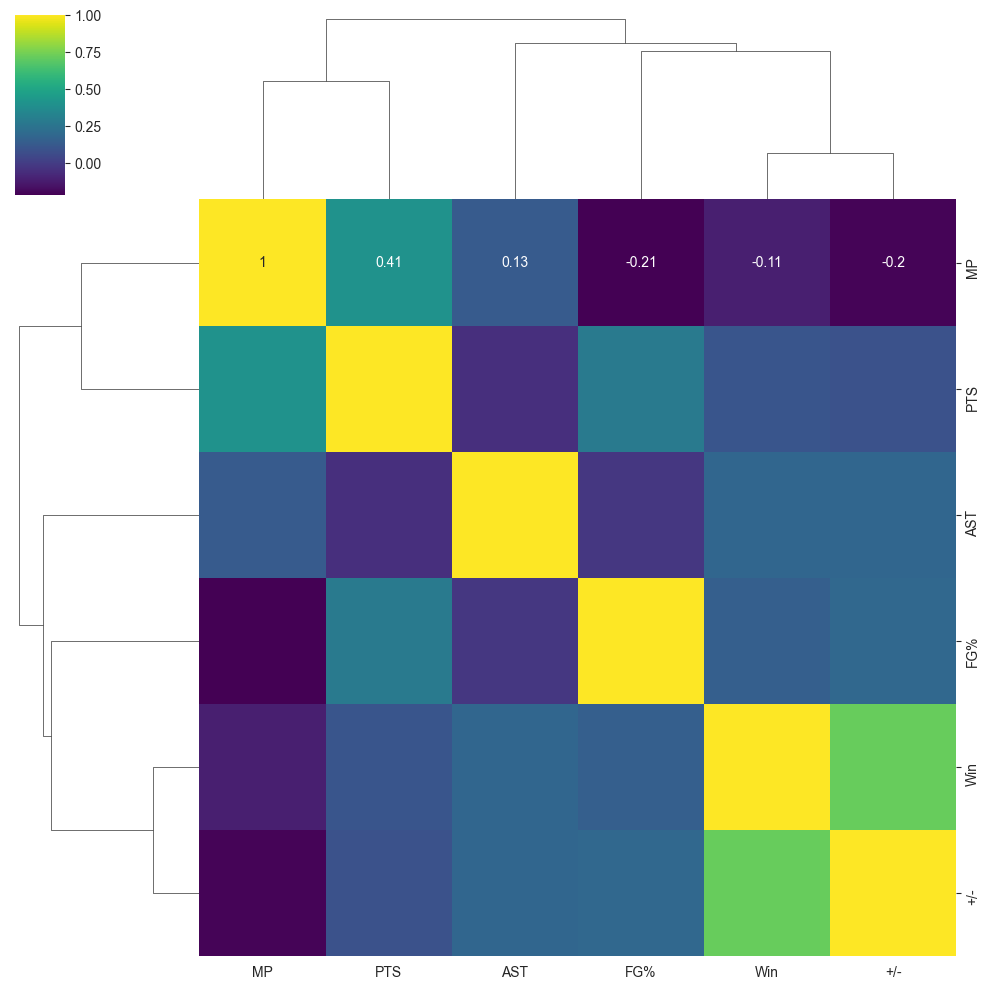

In [26]:
sns.clustermap(more_accurate_stats_for_win_df.corr(), cmap="viridis", annot=True)

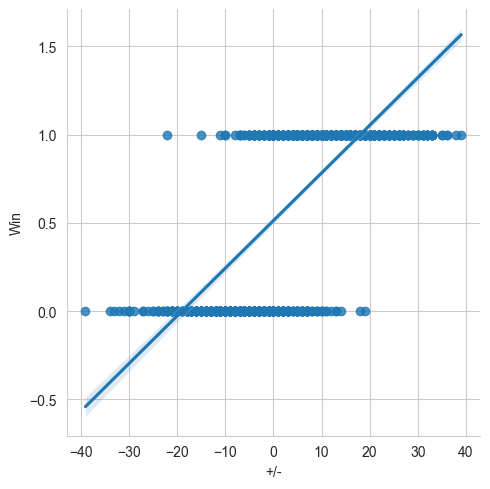

In [27]:
sns.lmplot(x="+/-", y="Win", data=more_accurate_stats_for_win_df)
# Pour les deux joueurs, il a a une forte corrélation entre Win et +/-. En plus ils ont à peu près le même impact sur les matchs en terme de +/-!

In [ ]:
# Maintenant un peu de machine learning pour montrer ce qu'on peut faire avec ces données
# For Algorithm, since more than 50 samples, predicting win or not depending his stats, labeled data, less than 100k samples
# So we use Linear SVC algorithm

In [28]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [29]:
X = more_accurate_stats_for_win_df_steph[["MP", "FG%", "AST", "PTS", "+/-"]]
y = more_accurate_stats_for_win_df_steph["Win"]

In [31]:
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.15)

In [34]:
lsvc = LinearSVC(verbose=0, dual=False)
print(lsvc)

LinearSVC(dual=False)


In [43]:
lsvc.fit(xtrain, ytrain)
score = lsvc.score(xtrain, ytrain)
print("Score: ", score)

Score:  0.8776881720430108


In [44]:
cv_scores = cross_val_score(lsvc, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

CV average score: 0.88


In [45]:
ypred = lsvc.predict(xtest)

In [46]:
cm = confusion_matrix(ytest, ypred)
print(cm)

[[40  7]
 [15 70]]


In [48]:
cr = classification_report(ytest, ypred)
print(cr) 

              precision    recall  f1-score   support

           0       0.73      0.85      0.78        47
           1       0.91      0.82      0.86        85

    accuracy                           0.83       132
   macro avg       0.82      0.84      0.82       132
weighted avg       0.84      0.83      0.84       132



In [51]:
steph_df.head()

Unnamed: 0  G_x             Date_x Start (ET) Unnamed: 3 Unnamed: 4  \
0           0    1  Wed, Oct 28, 2009     10:30p        NaN  Box Score   
1           1    2  Fri, Oct 30, 2009     10:00p        NaN  Box Score   
2           2    3   Wed, Nov 4, 2009     10:30p        NaN  Box Score   
3           3    4   Fri, Nov 6, 2009     10:30p        NaN  Box Score   
4           4    5   Sun, Nov 8, 2009      9:00p        NaN  Box Score   

  Unnamed: 5_x              Opponent Unnamed: 7_x Unnamed: 8  ...  STL  BLK  \
0          NaN       Houston Rockets            L        NaN  ...  4.0  0.0   
1            @          Phoenix Suns            L        NaN  ...  1.0  0.0   
2          NaN     Memphis Grizzlies            W        NaN  ...  2.0  0.0   
3          NaN  Los Angeles Clippers            L        NaN  ...  0.0  0.0   
4            @      Sacramento Kings            L        NaN  ...  0.0  0.0   

   TOV   PF   PTS  GmSc   +/-   Season_y  Year  Win  
0  2.0  2.0  14.0  15.5   7.0  2009-2010  2009    0  
1  3.0  5.0  12.0   7.1 -19.0  2009-2010  2009    0  
2  1.0  4.0   7.0  11.2  -4.0  2009-2010  2009    1  
3  0.0  6.0   5.0   1.5 -13.0  2009-2010  2009    0  
4  5.0  4.0   9.0   3.4  -5.0  2009-2010  2009    0  

[5 rows x 51 columns]

In [62]:
# User interaction system
mp = float(input("How many seconds Steph plays? : "))
fg = float(input("How much FG%? : "))
ast = float(input("How many assists? : "))
pts = float(input("How many points? : "))
plus_minus = float(input("How much plus minus(+/-)? : "))

How many seconds Steph plays? :  2345
How much FG%? :  .556
How many assists? :  4.0
How many points? :  12
How much plus minus(+/-)? :  -19


In [63]:
lsvc.feature_names_in_ = ["mp", "fg", "ast", "pts", "plus_minus"]
new_X = np.array([[mp, fg, ast, pts, plus_minus]])
new_predict = lsvc.predict(new_X)
print(new_predict)

[0]


C:\Users\YAMADA Hibiki\anaconda3\envs\data_science\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [64]:
# Data analyse for users, Steph
steph_profile = ProfileReport(more_accurate_stats_for_win_df_steph, title="Steph Data")
steph_profile.to_notebook_iframe()
steph_profile.to_file("steph.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [65]:
# Data analyse for users, Lebron
lebron_profile = ProfileReport(more_accurate_stats_for_win_df, title="Lebron Data")
lebron_profile.to_notebook_iframe()
lebron_profile.to_file("Lebron.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]